# Welcome to [*insert course name here*]

In [1]:
import ipywidgets as widgets
from IPython.display import Math, YouTubeVideo, HTML
from helper_functions import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from IPython.display import display
from datetime import timedelta
import ipywidgets as widgets
from traitlets import Unicode, Int, validate

In [2]:
a = YouTubeVideo('ARJ8cAGm6JE')
start=int(timedelta(hours=0, minutes=46, seconds=40).total_seconds())

In [3]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    minutes = int(b.time/60)
    seconds = int(b.time-int(b.time/60))
    vid = YouTubeVideo('ARJ8cAGm6JE', start=timedelta(hours=0, minutes=minutes, seconds=seconds))
    display(vid)

button.on_click(on_button_clicked)
button.time = 64

Button(description='Click Me!', style=ButtonStyle())

In [4]:
class CounterWidget(widgets.DOMWidget):
    _view_name = Unicode('CounterView').tag(sync=True)
    _view_module = Unicode('counter').tag(sync=True)
    value = Int(0).tag(sync=True)

In [5]:
%%javascript
// We make sure the `counter` module is defined
// only once.
require.undef('counter');

// We define the `counter` module depending on the
// Jupyter widgets framework.
define('counter', ["@jupyter-widgets/base"],
       function(widgets) {

    // We create the CounterView frontend class,
    // deriving from DOMWidgetView.
    var CounterView = widgets.DOMWidgetView.extend({

        // This method creates the HTML widget.
        render: function() {
            // The value_changed() method should be
            // called when the model's value changes
            // on the kernel side.
            this.value_changed();
            this.model.on('change:value',
                          this.value_changed, this);

            var model = this.model;
            var that = this;

            // We create the plus and minus buttons.
            this.bm = $('<button/>')
            .text('-')
            .click(function() {
                // When the button is clicked,
                // the model's value is updated.
                var x = model.get('value');
                model.set('value', x - 1);
                that.touch();
            });

            this.bp = $('<button/>')
            .text('+')
            .click(function() {
                var x = model.get('value');
                model.set('value', x + 1);
                that.touch();
            });

            // This element displays the current
            // value of the counter.
            this.span = $('<span />')
            .text('0')
            .css({marginLeft: '10px',
                  marginRight: '10px'});

            // this.el represents the widget's DOM
            // element. We add the minus button,
            // the span element, and the plus button.
            $(this.el)
            .append(this.bm)
            .append(this.span)
            .append(this.bp);
        },

        value_changed: function() {
            // Update the displayed number when the
            // counter's value changes.
            var x = this.model.get('value');
            $($(this.el).children()[1]).text(x);
        },
    });

    return {
        CounterView : CounterView
    };
});

<IPython.core.display.Javascript object>

In [6]:
m = CounterWidget()
m

CounterWidget()

In [21]:
dropdown_math('In more detail', r'\begin{align} E = mc^2 \end{align} \\')

Accordion(children=(Output(),), selected_index=None, _titles={'0': 'In more detail'})

## Regression using Bayes
Let's fit a linear trendline to some data. Start by generating 20 datapoints on a line:

In [8]:
no_points = 20
# gradient
m = 0.6
c = 0.3

xs = np.linspace(0, 10, no_points)
ys = m*xs+c

Add some gaussian noise, with 0 mean, 0.5 variance, and plot:

In [9]:
ys += np.random.normal(0, 0.5, no_points)

plt.title('Noisy line data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xs, ys, marker = 'x', color = 'black')

Calculate the dataset's $\Phi$ matrix and the weights which optimize least squares.

In [24]:
phi = [[x**n for n in range(2)] for x in xs]
phi = np.array(phi)
w = (np.linalg.inv((phi.T).dot(phi))).dot((phi.T).dot(ys))

Calculate $\Phi$ matrix for best fit line,

In [25]:
x_range = np.linspace(0, 10, 100)
phi_ = [[x**n for n in range(2)] for x in x_range]
phi_ = np.array(phi_)
prediction = phi_.dot(w)

and plot results.

In [26]:
plt.title('Noisy line data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xs, ys, marker = 'x', color = 'black')
plt.plot(x_range, prediction, color = 'red')

What if we instead sample the weights (gradient and intercept) from the underlying probability distribution? Calculate the mean (vector) and covariance (matrix) of the weights:

In [27]:
loss = np.sum((phi.dot(w) - ys)**2)/no_points
beta = 1/loss

A = beta*(phi.T).dot(phi)
B = beta*np.linalg.inv(A).dot(phi.T)

mean = B.dot(ys)
cov = np.linalg.inv(A)

Sample weight/intercept pairs five times:

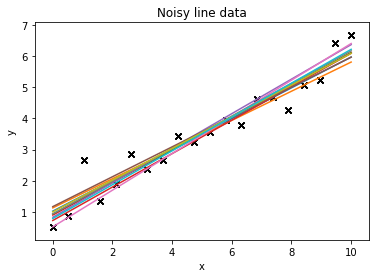

In [29]:
for i in range(5):
    Z = np.linalg.cholesky(cov)
    w_ = np.random.normal(0, 1, 2)
    w_ = Z.dot(w_)
    w_ += mean
    phi_ = [[x**n for n in range(2)] for x in x_range]
    phi_ = np.array(phi_)
    prediction = phi_.dot(w_)

    plt.plot(x_range, prediction)

plt.title('Noisy line data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(xs, ys, marker = 'x', color = 'black')
plt.show()